In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


### Checking Null values

In [3]:
df.isnull().sum().any()

False

There are no null values in the dataset

In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

##### About Columns:
    - rank - It is the designation of Employee sub-divided into 3 categories Prof, AsstProf, AssocProf.
    - yrs.since.phd - Represents the number of years since the Employee has done his/her PhD.
    - yrs.service - This represents the number of years the employee has been Employeed for.
    - sex - This represents if the Employee is either a Male or Female.
    - salary - This represents the compensation being provided to the Employee.

### Plots to understand and deep dive into data provided

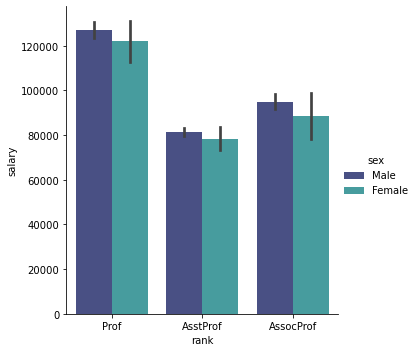

In [5]:
sns.catplot(x= 'rank',y='salary',data= df,kind='bar',hue='sex',palette='mako')

From above we could see that Prof. tend to get the highest salary where as AsstProf tend to get the lowest salaries.
We could also see that there is a difference in the salaries for the same position based on sex as well, womenn get paid slightly lower than male.

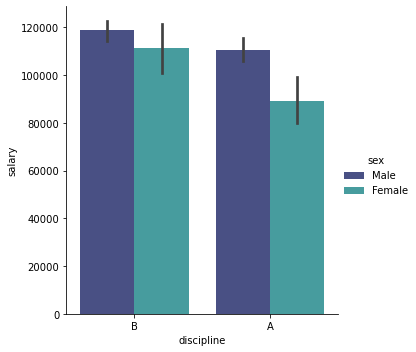

In [6]:
sns.catplot(x='discipline',y='salary',data=df,kind ='bar',hue='sex',palette='mako')

From above we can see that the employees working in decipline B tend to get paid higher than decipline A.
Again the female Employees tend to get paid lesser than their Male counterpart

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

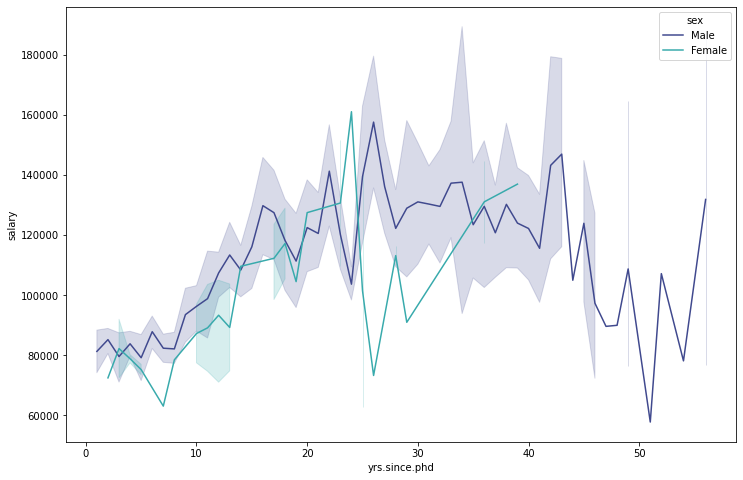

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(x='yrs.since.phd',y='salary',hue='sex',data= df,palette='mako')

From the above graph we can see that the max years since PhD for male is 50+ but for female is less than 40.
We can also see that the Men in range 25-43 since their PHd then to have a strong distribution and tend to get paid high.
Women have the highest distribution in range 10-13 years since their PhD and have highest salary being paid for employees with 21-23 years since their PhD.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

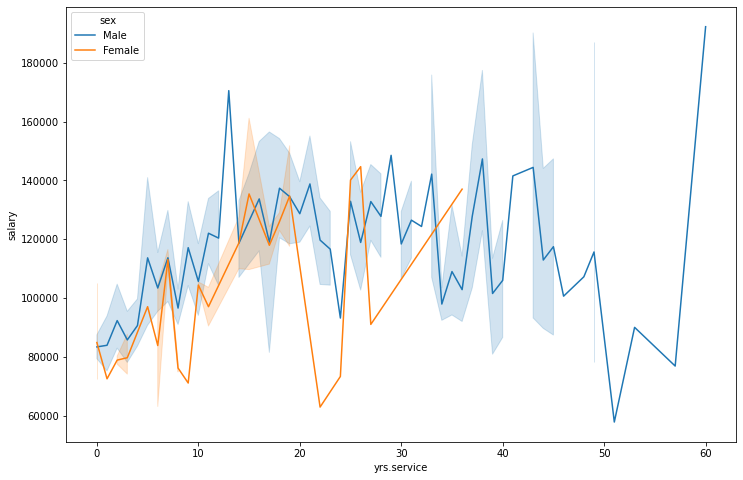

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(x='yrs.service',y='salary',hue='sex',data= df)

From above we can see that the Employee with 58-59 years of service tends to get paid the highest, where as the maximum distribution seems to be between 15-23 years of service.
Women at about 26 years of service tend to get paid the Highest but the maximum distribution seems to be between 12-18 years of service.

<AxesSubplot:xlabel='sex', ylabel='salary'>

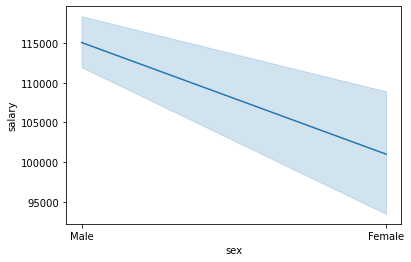

In [9]:
sns.lineplot(x='sex',y='salary',data=df)

We can see that the salaries of male are clearly higher than that of the female.

### Describing Dataset

In [10]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


### Outcome of Describe

Total Number of Rows : 397

Total Number of non Categorical Columns : 3

yrs.since.phd -
    1. Mean = 22.314861
    2. Standard Deviation = 12.887003
    3. Max Value = 56.000000
    4. Min Value = 1.000000
    
yrs.service - 
    1. Mean = 17.614610
    2. Standard Deviation = 13.006024
    3. Max Value = 60.00000
    4. Min Value = 0.000000
    
Salary - 
    1. Mean = 113706.458438
    2. Standard Deviation = 30289.038695
    3. Max Value = 231545.000000
    4. Min Value = 57800.000000

### Checking for outliers

In [11]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

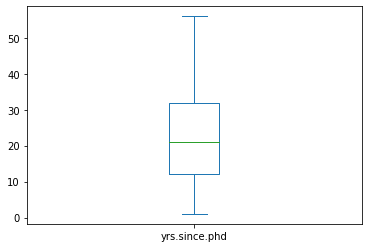

In [12]:
df['yrs.since.phd'].plot(kind='box')
plt.show()

There are no outliers in the above plot

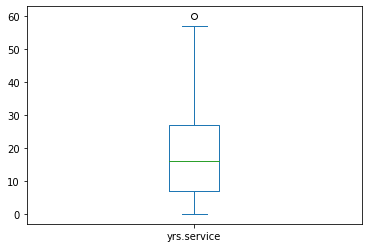

In [13]:
df['yrs.service'].plot(kind='box')
plt.show()

We see that there are outliers in the above plot

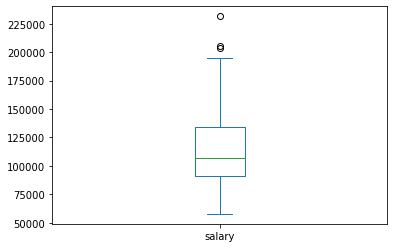

In [14]:
df['salary'].plot(kind='box')
plt.show()

There are a few outliers according to the above plot

### Removing Outliers using IQR

In [58]:
df.shape

(397, 8)

In [59]:
def Outliers (column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    outliers = df[(df[column]<lower_limit) | (df[column]> upper_limit)]
    print(outliers)

Salary Column :

In [60]:
Outliers('salary')

     rank  yrs.since.phd  yrs.service  salary  sex_Female  sex_Male  \
43      2             38           38  231545           0         1   
249     2             29            7  204000           0         1   
364     2             43           43  205500           0         1   

     discipline_A  discipline_B  
43              0             1  
249             1             0  
364             1             0  


In [61]:
Outliers('yrs.service')

     rank  yrs.since.phd  yrs.service  salary  sex_Female  sex_Male  \
330     2             49           60  192253           0         1   

     discipline_A  discipline_B  
330             0             1  


In [62]:
df_without_outliers = df.drop([43,249,330,364],axis = 0)

In [63]:
df_without_outliers.shape

(393, 8)

#### Percentage Data loss

In [64]:
loss_percentage = (397-393)/397*100
loss_percentage

1.0075566750629723

### Checking Skewness

In [65]:
df_without_outliers.skew()

rank            -1.135734
yrs.since.phd    0.312229
yrs.service      0.617039
salary           0.548355
sex_Female       2.691158
sex_Male        -2.691158
discipline_A     0.179514
discipline_B    -0.179514
dtype: float64

In [66]:
df_without_outliers.columns

Index(['rank', 'yrs.since.phd', 'yrs.service', 'salary', 'sex_Female',
       'sex_Male', 'discipline_A', 'discipline_B'],
      dtype='object')

Distribution Plot For :- yrs.since.phd


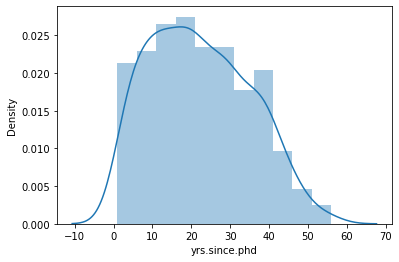

Distribution Plot For :- yrs.service


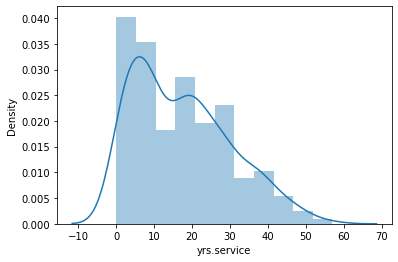

Distribution Plot For :- salary


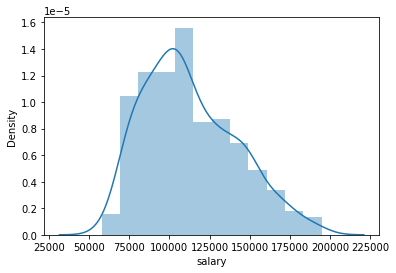

In [67]:
columns = ['yrs.since.phd', 'yrs.service', 'salary']

for column in columns:
    print('Distribution Plot For :-',column)
    sns.distplot(df_without_outliers[column])
    plt.show()

From the above we see that all the features in the graph are not normaalized and have skewness

### Checking Data Type

In [68]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 396
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           393 non-null    int32
 1   yrs.since.phd  393 non-null    int64
 2   yrs.service    393 non-null    int64
 3   salary         393 non-null    int64
 4   sex_Female     393 non-null    uint8
 5   sex_Male       393 non-null    uint8
 6   discipline_A   393 non-null    uint8
 7   discipline_B   393 non-null    uint8
dtypes: int32(1), int64(3), uint8(4)
memory usage: 15.4 KB


We have 3 categorical features in the dataset

#### OneHot Encoding and Label Encoding

In [69]:
df_without_outliers = pd.get_dummies(df_without_outliers,columns=['sex','discipline'])

KeyError: "None of [Index(['sex', 'discipline'], dtype='object')] are in the [columns]"

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_without_outliers['rank'] = le.fit_transform(df_without_outliers['rank'])

In [71]:
df_without_outliers['Salary'] = df_without_outliers['salary']
df_without_outliers.drop('salary',axis=1,inplace=True)

In [72]:
df_without_outliers

,rank,yrs.since.phd,yrs.service,sex_Female,sex_Male,discipline_A,discipline_B,Salary
0,2,19,18,0,1,0,1,139750
1,2,20,16,0,1,0,1,173200
2,1,4,3,0,1,0,1,79750
3,2,45,39,0,1,0,1,115000
4,2,40,41,0,1,0,1,141500
...,...,...,...,...,...,...,...,...
392,2,33,30,0,1,1,0,103106
393,2,31,19,0,1,1,0,150564
394,2,42,25,0,1,1,0,101738
395,2,25,15,0,1,1,0,95329


### Correlations

In [73]:
df_without_outliers.corr()

,rank,yrs.since.phd,yrs.service,sex_Female,sex_Male,discipline_A,discipline_B,Salary
rank,1.000000,0.523435,0.448688,-0.130664,0.130664,0.086308,-0.086308,0.530348
yrs.since.phd,0.523435,1.000000,0.911094,-0.145927,0.145927,0.223412,-0.223412,0.402333
yrs.service,0.448688,0.911094,1.000000,-0.152239,0.152239,0.177488,-0.177488,0.311685
sex_Female,-0.130664,-0.145927,-0.152239,1.000000,-1.000000,0.004044,-0.004044,-0.135246
sex_Male,0.130664,0.145927,0.152239,-1.000000,1.000000,-0.004044,0.004044,0.135246
discipline_A,0.086308,0.223412,0.177488,0.004044,-0.004044,1.000000,-1.000000,-0.167265
discipline_B,-0.086308,-0.223412,-0.177488,-0.004044,0.004044,-1.000000,1.000000,0.167265
Salary,0.530348,0.402333,0.311685,-0.135246,0.135246,-0.167265,0.167265,1.000000


<AxesSubplot:>

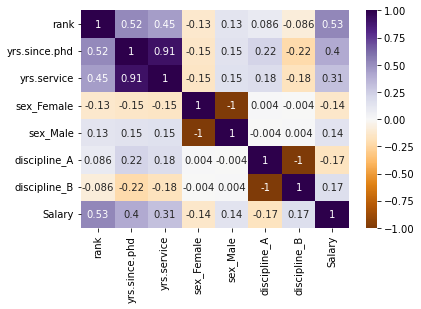

In [74]:
sns.heatmap(df_without_outliers.corr(),annot=True,cmap='PuOr')

sex_Female and discipline_A have a slight negitive correlation with salary of about 14% and 16%.
All the other features have a positive correlation.

Strongest Correlation = Rank (53%)

Weakest Correlation = sex_Male & sex_Female (14%)

Model without outliers is df_without_outliers and model with outliers is df

# Model without outliers :

Splitting the dataset in to Features and Vectors

In [75]:
X = df_without_outliers.drop('Salary',axis=1)
X.shape

(393, 7)

In [76]:
y = df_without_outliers['Salary']
y.shape

(393,)

### Transforming data to remove Skewness

In [77]:
from sklearn.preprocessing import power_transform
x = power_transform(X,method='yeo-johnson')

In [78]:
x

array([[ 0.69481738, -0.11333255,  0.26130206, ...,  0.3319179 ,
        -0.91457564,  0.91457564],
       [ 0.69481738, -0.03494346,  0.11429593, ...,  0.3319179 ,
        -0.91457564,  0.91457564],
       [-1.0753989 , -1.62420566, -1.28540514, ...,  0.3319179 ,
        -0.91457564,  0.91457564],
       ...,
       [ 0.69481738,  1.41179946,  0.71485522, ...,  0.3319179 ,
         1.09340328, -1.09340328],
       [ 0.69481738,  0.33544494,  0.03701509, ...,  0.3319179 ,
         1.09340328, -1.09340328],
       [-1.0753989 , -1.12655992, -1.12096546, ...,  0.3319179 ,
         1.09340328, -1.09340328]])

In [79]:
y = np.log(1+y)

### Scaling the Model

In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.69481738, -0.11333255,  0.26130206, ...,  0.3319179 ,
        -0.91457564,  0.91457564],
       [ 0.69481738, -0.03494346,  0.11429593, ...,  0.3319179 ,
        -0.91457564,  0.91457564],
       [-1.0753989 , -1.62420566, -1.28540514, ...,  0.3319179 ,
        -0.91457564,  0.91457564],
       ...,
       [ 0.69481738,  1.41179946,  0.71485522, ...,  0.3319179 ,
         1.09340328, -1.09340328],
       [ 0.69481738,  0.33544494,  0.03701509, ...,  0.3319179 ,
         1.09340328, -1.09340328],
       [-1.0753989 , -1.12655992, -1.12096546, ...,  0.3319179 ,
         1.09340328, -1.09340328]])

## Splitting the dataframe into Train and Test

In [81]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

In [83]:
def Train (model,x,y):
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred = model.predict(x_test)
    print('Model Report')
    print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
    print('Mean Squared Error :', mean_squared_error(y_test,pred))
    print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2 Square :', r2_score(y_test,pred))
    try:
        coef = pd.Series(model.coef_,X.columns).sort_values()
    except:
        coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True)
    coef.plot(kind='bar',title = 'Model Coefficients')
    plt.show()

Model Report
Mean Absolute Error :  0.15918247325713494
Mean Squared Error : 0.03639267279225833
Root Mean Squared Error : 0.190768636815013
r2 Square : 0.5207167107690425


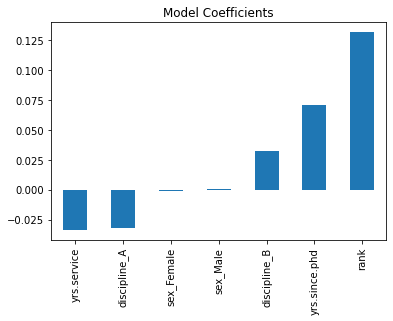

In [84]:
model = LinearRegression()

Train(model,x,y)

Model Report
Mean Absolute Error :  0.1590652973567463
Mean Squared Error : 0.036383996640750454
Root Mean Squared Error : 0.19074589547550022
r2 Square : 0.520830973726762


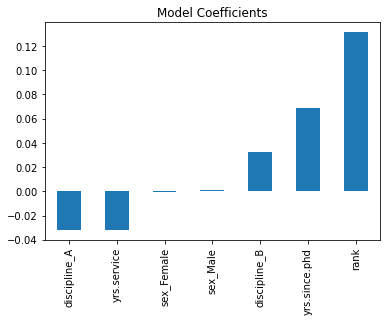

In [85]:
model = Ridge()

Train(model,x,y)

Model Report
Mean Absolute Error :  0.23675891456047007
Mean Squared Error : 0.07791873689355205
Root Mean Squared Error : 0.2791392786648845
r2 Square : -0.026172183731651533


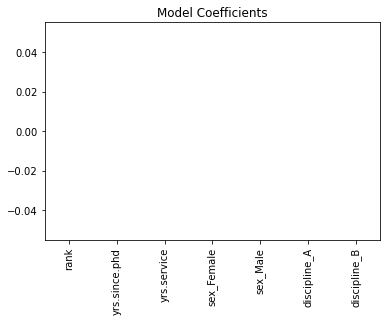

In [86]:
model = Lasso()

Train(model,x,y)

Model Report
Mean Absolute Error :  0.16103257736646312
Mean Squared Error : 0.05250979677691339
Root Mean Squared Error : 0.22915016207044975
r2 Square : 0.3084578244705931


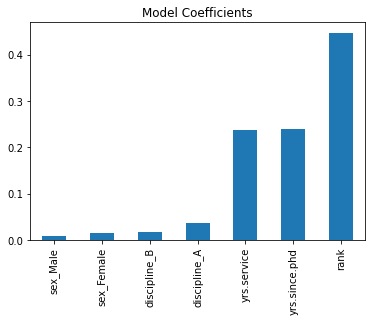

In [87]:
model = DecisionTreeRegressor()

Train(model,x,y)

Model Report
Mean Absolute Error :  0.13691909380498962
Mean Squared Error : 0.03379573122580099
Root Mean Squared Error : 0.18383615320660132
r2 Square : 0.5549178452396342


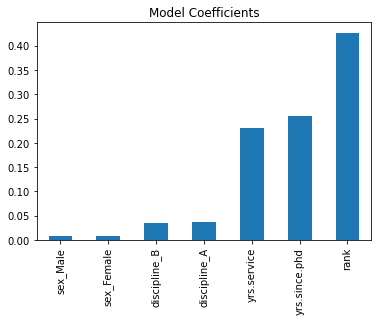

In [88]:
model = RandomForestRegressor()
Train(model,x,y)

Model Report
Mean Absolute Error :  0.1387776283021407
Mean Squared Error : 0.035259301077298966
Root Mean Squared Error : 0.18777460178974942
r2 Square : 0.5356429605272798


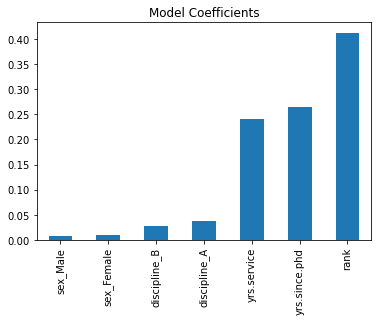

In [89]:
model = ExtraTreesRegressor()

Train(model,x,y)

#### From all the above models we see that RandomForest gives the best results

### EDA for Model with outliers

Encoding

In [47]:
df = pd.get_dummies(df,columns=['sex','discipline'])

In [48]:
df['rank'] = le.fit_transform(df['rank'])
df

,rank,yrs.since.phd,yrs.service,salary,sex_Female,sex_Male,discipline_A,discipline_B
0,2,19,18,139750,0,1,0,1
1,2,20,16,173200,0,1,0,1
2,1,4,3,79750,0,1,0,1
3,2,45,39,115000,0,1,0,1
4,2,40,41,141500,0,1,0,1
...,...,...,...,...,...,...,...,...
392,2,33,30,103106,0,1,1,0
393,2,31,19,150564,0,1,1,0
394,2,42,25,101738,0,1,1,0
395,2,25,15,95329,0,1,1,0


Splitting the data in features and vectors

In [49]:
X = df.drop('salary',axis=1)
X.shape

(397, 7)

In [50]:
y = df['salary']
y.shape

(397,)

Normalizing the data

In [51]:
x = power_transform(X,method='yeo-johnson')

In [52]:
y= np.log(1+y)

Scaling the model

In [53]:
x = sc.fit_transform(x)

Splitting the data in Train and Test

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)

Testing the Models

In [55]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()
dtc = DecisionTreeRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()

models = [lr,rd,ls,dtc,rf,et]

LinearRegression()
Model Report
Mean Absolute Error :  0.14883691640425997
Mean Squared Error : 0.03737803946865762
Root Mean Squared Error : 0.19333401011890697
r2 Square : 0.4166673993837854


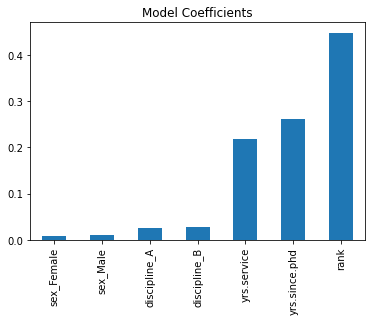

Ridge()
Model Report
Mean Absolute Error :  0.14844452614061346
Mean Squared Error : 0.03724527873705716
Root Mean Squared Error : 0.19299035918163673
r2 Square : 0.4187393021353769


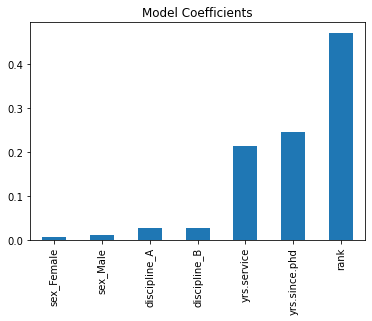

Lasso()
Model Report
Mean Absolute Error :  0.14993975601425613
Mean Squared Error : 0.03766269680183029
Root Mean Squared Error : 0.19406879399282692
r2 Square : 0.4122249539049815


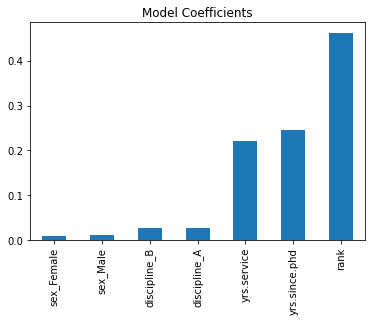

DecisionTreeRegressor()
Model Report
Mean Absolute Error :  0.14996928871769355
Mean Squared Error : 0.03729782585825365
Root Mean Squared Error : 0.193126450436634
r2 Square : 0.4179192364150187


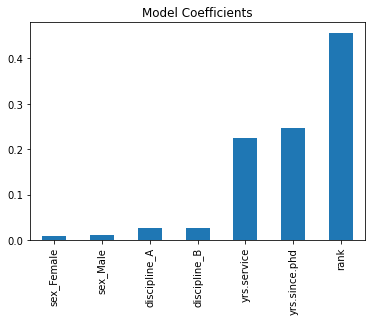

RandomForestRegressor()
Model Report
Mean Absolute Error :  0.14989204777173742
Mean Squared Error : 0.03749286431916672
Root Mean Squared Error : 0.1936307421851363
r2 Square : 0.4148754092308774


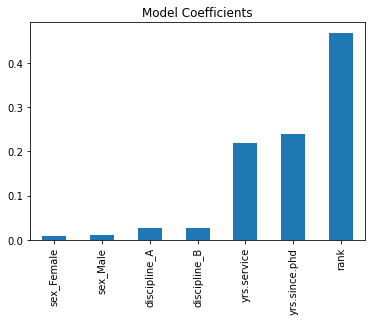

ExtraTreesRegressor()
Model Report
Mean Absolute Error :  0.15055114172555092
Mean Squared Error : 0.037266340731102666
Root Mean Squared Error : 0.19304491894660855
r2 Square : 0.41841060250491524


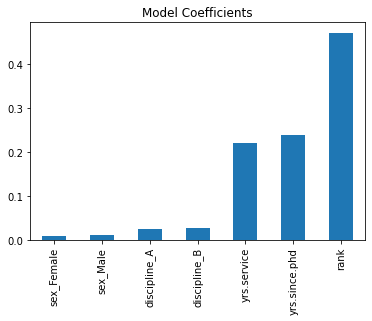

In [56]:
for i in models:
    print(i)
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred = model.predict(x_test)
    print('Model Report')
    print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
    print('Mean Squared Error :', mean_squared_error(y_test,pred))
    print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2 Square :', r2_score(y_test,pred))
    try:
        coef = pd.Series(model.coef_,X.columns).sort_values()
    except:
        coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True)
    coef.plot(kind='bar',title = 'Model Coefficients')
    plt.show()

The scores for model with outliers are lower than the model without outliers

## Conclusion : From the above we see that the best Model is RandomForest without outliers and that should be selected as the final model

Model Report
Mean Absolute Error :  0.1385644823809998
Mean Squared Error : 0.03275917845564121
Root Mean Squared Error : 0.18099496803955964
r2 Square : 0.5685690113405566


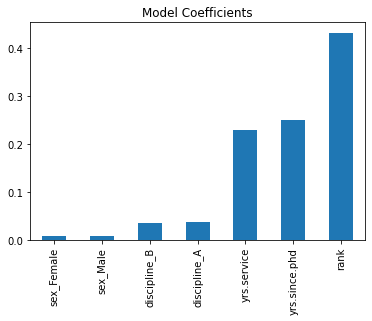

In [97]:
model = RandomForestRegressor()
Train(model,x,y)